In [1]:
import ROOT

# for creating a responsive plot
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
infile = '/Users/yuntse/data/coherent/preLArTPC/geant4/CR1M/cosmic_g4_0000.root'

In [3]:
df = pd.DataFrame(ROOT.RDataFrame("edep", infile).AsNumpy())

In [4]:
df

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
0,12.731841,-2712.904160,-132.821630,6982.100527,0,0,13,10750.850399,-2683.434573,-150.263857,7000.000000,3
1,4.837000,-2722.859871,-126.933574,6976.049304,0,0,13,10737.669933,-2712.904160,-132.821630,6982.100527,3
2,2.342634,-2728.577189,-123.549460,6972.573686,0,0,13,10732.350500,-2722.859871,-126.933574,6976.049304,3
3,10.142081,-2751.162211,-110.183971,6958.864657,0,0,13,10722.746066,-2728.577189,-123.549460,6972.573686,3
4,25.156361,-2806.523779,-77.472289,6925.288587,0,0,13,10711.191447,-2751.162211,-110.183971,6958.864657,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6460375,0.032553,3510.563436,4548.477334,6991.847115,999,1217,11,0.543551,3510.565335,4548.480442,6991.848838,1221
6460376,0.002757,3514.145638,4548.708412,6991.485418,999,1217,11,0.513756,3514.145595,4548.708414,6991.485385,1220
6460377,0.005610,3509.894072,4550.886610,6971.672935,999,1217,11,0.516609,3509.894123,4550.886651,6971.673105,1219
6460378,0.000013,3512.986566,4555.486253,6980.270155,999,1010,22,0.025754,3513.005290,4556.269888,6981.320786,1216


In [5]:
# unit in mm, half the dimension
# Fiducial volume
FX = 250.
FY = 200.
FZ = 250.
# TPC volume
TPCX = 300.
TPCY = 250.
TPCZ = 300.

In [6]:
ActiveVolume = ( ( -TPCX, +TPCX ), ( -TPCY, +TPCY ), ( -TPCZ, +TPCZ ) )
def selInActiveVolume(colX, colY, colZ):
    return df[colX].between(*ActiveVolume[0]) & df[colY].between(*ActiveVolume[1]) & df[colZ].between(*ActiveVolume[2])

In [7]:
inTPC = df[(selInActiveVolume('startX', 'startY', 'startZ')|selInActiveVolume('endX', 'endY', 'endZ'))&(df.dE>0)]

In [8]:
ByEvent = inTPC.groupby('event')

In [9]:
evt = ByEvent.get_group(229)
evt

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
1501848,4.903008,-15.691699,244.001819,67.984891,229,0,13,1142.750101,-21.460267,254.054749,93.494618,2
1501849,2.959573,-12.254875,237.931863,52.836892,229,0,13,1137.407792,-15.691699,244.001819,67.984891,2
1501850,2.426893,-9.574721,232.909953,40.394813,229,0,13,1134.131598,-12.254875,237.931863,52.836892,2
1501851,4.579416,-3.918447,222.201355,14.214460,229,0,13,1130.290455,-9.574721,232.909953,40.394813,2
1501852,8.238418,4.511718,206.500806,-24.812760,229,0,13,1125.259002,-3.918447,222.201355,14.214460,2
1501853,2.350940,7.198603,201.570943,-36.926394,229,0,13,1116.087422,4.511718,206.500806,-24.812760,2
1501854,0.022907,7.238205,201.495912,-37.108997,229,0,13,1113.407307,7.198603,201.570943,-36.926394,2
1501855,8.318580,16.368402,184.299636,-79.008774,229,0,13,1112.666083,7.238205,201.495912,-37.108997,2
1501856,0.727029,17.253526,183.103733,-82.603703,229,0,13,1104.347504,16.368402,184.299636,-79.008774,2
1501857,14.711772,35.586606,158.117082,-157.169000,229,0,13,1101.115835,17.253526,183.103733,-82.603703,2


In [10]:
muonSteps = evt[evt.pdg.abs() == 13]
muonSteps

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
1501848,4.903008,-15.691699,244.001819,67.984891,229,0,13,1142.750101,-21.460267,254.054749,93.494618,2
1501849,2.959573,-12.254875,237.931863,52.836892,229,0,13,1137.407792,-15.691699,244.001819,67.984891,2
1501850,2.426893,-9.574721,232.909953,40.394813,229,0,13,1134.131598,-12.254875,237.931863,52.836892,2
1501851,4.579416,-3.918447,222.201355,14.214460,229,0,13,1130.290455,-9.574721,232.909953,40.394813,2
1501852,8.238418,4.511718,206.500806,-24.812760,229,0,13,1125.259002,-3.918447,222.201355,14.214460,2
1501853,2.350940,7.198603,201.570943,-36.926394,229,0,13,1116.087422,4.511718,206.500806,-24.812760,2
1501854,0.022907,7.238205,201.495912,-37.108997,229,0,13,1113.407307,7.198603,201.570943,-36.926394,2
1501855,8.318580,16.368402,184.299636,-79.008774,229,0,13,1112.666083,7.238205,201.495912,-37.108997,2
1501856,0.727029,17.253526,183.103733,-82.603703,229,0,13,1104.347504,16.368402,184.299636,-79.008774,2
1501857,14.711772,35.586606,158.117082,-157.169000,229,0,13,1101.115835,17.253526,183.103733,-82.603703,2


In [11]:
muons = muonSteps.groupby('trackID')

In [12]:
len(muons)

1

In [13]:
muon = muons.get_group(2)
muon

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
1501848,4.903008,-15.691699,244.001819,67.984891,229,0,13,1142.750101,-21.460267,254.054749,93.494618,2
1501849,2.959573,-12.254875,237.931863,52.836892,229,0,13,1137.407792,-15.691699,244.001819,67.984891,2
1501850,2.426893,-9.574721,232.909953,40.394813,229,0,13,1134.131598,-12.254875,237.931863,52.836892,2
1501851,4.579416,-3.918447,222.201355,14.214460,229,0,13,1130.290455,-9.574721,232.909953,40.394813,2
1501852,8.238418,4.511718,206.500806,-24.812760,229,0,13,1125.259002,-3.918447,222.201355,14.214460,2
1501853,2.350940,7.198603,201.570943,-36.926394,229,0,13,1116.087422,4.511718,206.500806,-24.812760,2
1501854,0.022907,7.238205,201.495912,-37.108997,229,0,13,1113.407307,7.198603,201.570943,-36.926394,2
1501855,8.318580,16.368402,184.299636,-79.008774,229,0,13,1112.666083,7.238205,201.495912,-37.108997,2
1501856,0.727029,17.253526,183.103733,-82.603703,229,0,13,1104.347504,16.368402,184.299636,-79.008774,2
1501857,14.711772,35.586606,158.117082,-157.169000,229,0,13,1101.115835,17.253526,183.103733,-82.603703,2


In [14]:
def stepTotalLength(steps):
    return sum(np.hypot(steps.endX - steps.startX, steps.endY - steps.startY, steps.endZ - steps.startZ))

In [15]:
def particleLengths(particles): return particles.apply(stepTotalLength)

In [16]:
muonicEvents = []
for eventNo, evt in inTPC.groupby('event'):
    muonSteps = evt[evt.pdg.abs() == 13]
    if len(muonSteps) == 0: continue # there are no muons in TPC
    muons = muonSteps.groupby('trackID')
    if (particleLengths(muons) < 50.0).all(): continue # muons in TPC are all shorter than 5 cm
    # ... more conditions?
    muonicEvents.append(eventNo) # ok, it's really a nasty muon
print(f"Found {len(muonicEvents)}/{len(inTPC.groupby('event'))} muonic events")

Found 5/10 muonic events


In [17]:
muonicEvents

[229, 238, 547, 663, 781]

In [18]:
for trackID, muonSteps in muons:
    print(f"{trackID=}")
    print(muonSteps)

trackID=3
                dE       endX        endY        endZ  event  motherID  pdg  \
5036457  14.742895 -85.632032  -99.537805  274.074214    781         0   13   
5036458   1.060544 -85.371182 -101.173861  268.187136    781         0   13   
5036459   6.990503 -84.044737 -110.976995  233.354589    781         0   13   
5036460  12.316727 -79.096913 -129.348276  165.731215    781         0   13   
5036461  12.311463 -75.291720 -147.216748  102.885296    781         0   13   
5036462   0.139623 -75.266552 -147.338454  102.431486    781         0   13   
5036463   4.310993 -73.904752 -152.892813   81.419665    781         0   13   
5036464   4.139799 -73.114154 -158.771241   60.430015    781         0   13   
5036465   0.998700 -73.014994 -159.912662   56.114832    781         0   13   
5036466   0.437628 -72.986771 -160.683513   53.363767    781         0   13   
5036467  12.701385 -72.254800 -178.383406  -10.344259    781         0   13   
5036468   2.843884 -71.960382 -182.954430 

In [19]:
columns = [ 'Run', 'Event', 'FiducialE', 'OutE' ]
odf = pd.DataFrame( columns = columns )

In [20]:
for eventNo, evt in inTPC.groupby('event'):
    if eventNo in muonicEvents:
        continue
    cs = evt[(evt.pdg.abs()==11)|(evt.pdg.abs()==13)|(evt.pdg.abs()==211)|(evt.pdg==2212)]
    maskFi = (cs.startX.abs() <= FX)&(cs.startY.abs() <= FY)&(cs.startZ.abs() <= FZ)& \
             (cs.endX.abs() <= FX)&(cs.endY.abs() <= FY)&(cs.endZ.abs() <= FZ)
    maskOut = ~maskFi & (cs.startX.abs() <= TPCX)&(cs.startY.abs() <= TPCY)&(cs.startZ.abs() <= TPCZ)& \
             (cs.endX.abs() <= TPCX)&(cs.endY.abs() <= TPCY)&(cs.endZ.abs() <= TPCZ)
    FiducialE = cs[maskFi].dE.sum()
    OutE = cs[maskOut].dE.sum()
    outCS = pd.DataFrame([{ 'Run': 0, 'Event': eventNo, 'FiducialE': FiducialE, 'OutE': OutE }])
    odf = pd.concat([ odf, outCS ], ignore_index = True)

In [21]:
odf

,Run,Event,FiducialE,OutE
0,0,165,0.000000,0.153584
1,0,331,0.159523,0.000000
2,0,384,0.000000,0.507793
3,0,509,0.000000,0.228477
4,0,749,0.000000,0.562273


In [22]:
detector_bounds = [[-30, 30], [-25, 25], [-30, 30]] # cm (x, y, z)
def draw_boundaries(ax):
    """
    Draw the detector boundaries as a wireframe
    not needed, but pretty
    """
    boundKwargs = {'color': 'black',
                   'ls': '--'}
    
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)

    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)

    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)

    return ax

In [34]:
iEvt = 749
Event = inTPC[inTPC.event == iEvt]
trackList = Event.trackID.unique()
visTrackList = Event[Event.pdg.isin((11, -11, 13, -13, 211, -211, 2212))].trackID.unique()
Event

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
4807226,0.141590,-259.598892,234.017633,224.040199,749,2258,11,0.652589,-259.562930,234.020259,224.102548,2261
4807227,0.420683,-253.113665,191.556594,251.522235,749,2258,11,0.931682,-253.002527,191.673194,251.897499,2260


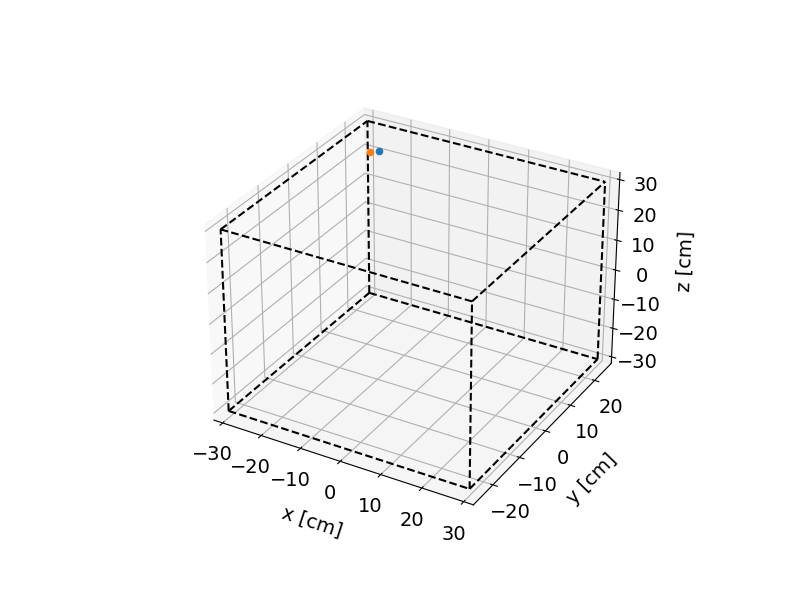

In [35]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
 
for t in visTrackList:
    ax.scatter( Event[(Event.trackID==t)]['startX']/10,
                Event[(Event.trackID==t)]['startY']/10,
                Event[(Event.trackID==t)]['startZ']/10,
                # s = Event[(Event.trackID==t)]['dE']/EvtMax * 14**2
              )
draw_boundaries(ax)
ax.set_xlabel('x [cm]', fontsize = 14, labelpad = 10)
ax.set_ylabel('y [cm]', fontsize = 14, labelpad = 10)
ax.set_zlabel('z [cm]', fontsize = 14, labelpad = 10)
ax.tick_params( axis = 'x', labelsize = 14 )
ax.tick_params( axis = 'y', labelsize = 14 )
ax.tick_params( axis = 'z', labelsize = 14 )
# ax.legend( fontsize = 18 )
ax.set_xlim( [-31, 31])
ax.set_ylim( [-26, 26])
ax.set_zlim( [-31, 31])
fig.savefig('CosmicRun0Evt749.pdf')

In [37]:
iEvt = 331
Event = inTPC[inTPC.event == iEvt]
trackList = Event.trackID.unique()
visTrackList = Event[Event.pdg.isin((11, -11, 13, -13, 211, -211, 2212))].trackID.unique()
Event

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
2185325,0.000327,-202.465851,-165.403697,-201.035628,331,1293,22,0.127742,-226.395112,-149.638891,-225.544184,1295
2185326,0.127416,-202.419215,-165.441609,-201.030254,331,1295,11,0.638415,-202.465851,-165.403697,-201.035628,1311
2185327,0.032108,-226.393342,-149.636605,-225.548895,331,1295,11,0.543106,-226.395112,-149.638891,-225.544184,1310


(-31.0, 31.0)

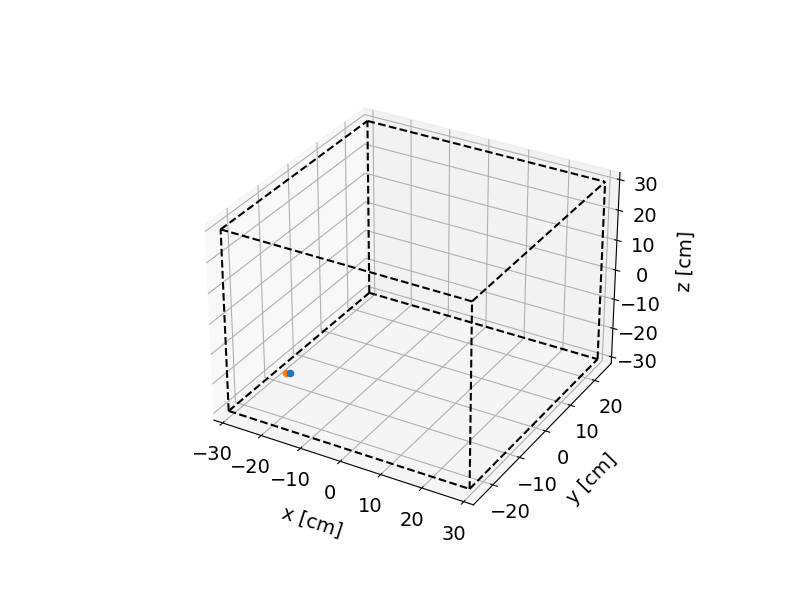

In [38]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
 
for t in visTrackList:
    ax.scatter( Event[(Event.trackID==t)]['startX']/10,
                Event[(Event.trackID==t)]['startY']/10,
                Event[(Event.trackID==t)]['startZ']/10,
                # s = Event[(Event.trackID==t)]['dE']/EvtMax * 14**2
              )
draw_boundaries(ax)
ax.set_xlabel('x [cm]', fontsize = 14, labelpad = 10)
ax.set_ylabel('y [cm]', fontsize = 14, labelpad = 10)
ax.set_zlabel('z [cm]', fontsize = 14, labelpad = 10)
ax.tick_params( axis = 'x', labelsize = 14 )
ax.tick_params( axis = 'y', labelsize = 14 )
ax.tick_params( axis = 'z', labelsize = 14 )
# ax.legend( fontsize = 18 )
ax.set_xlim( [-31, 31])
ax.set_ylim( [-26, 26])
ax.set_zlim( [-31, 31])

In [41]:
iEvt = 229
Event = inTPC[inTPC.event == iEvt]
trackList = Event.trackID.unique()
visTrackList = Event[Event.pdg.isin((11, -11, 13, -13, 211, -211, 2212))].trackID.unique()
Event

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
1501848,4.903008,-15.691699,244.001819,67.984891,229,0,13,1142.750101,-21.460267,254.054749,93.494618,2
1501849,2.959573,-12.254875,237.931863,52.836892,229,0,13,1137.407792,-15.691699,244.001819,67.984891,2
1501850,2.426893,-9.574721,232.909953,40.394813,229,0,13,1134.131598,-12.254875,237.931863,52.836892,2
1501851,4.579416,-3.918447,222.201355,14.214460,229,0,13,1130.290455,-9.574721,232.909953,40.394813,2
1501852,8.238418,4.511718,206.500806,-24.812760,229,0,13,1125.259002,-3.918447,222.201355,14.214460,2
1501853,2.350940,7.198603,201.570943,-36.926394,229,0,13,1116.087422,4.511718,206.500806,-24.812760,2
1501854,0.022907,7.238205,201.495912,-37.108997,229,0,13,1113.407307,7.198603,201.570943,-36.926394,2
1501855,8.318580,16.368402,184.299636,-79.008774,229,0,13,1112.666083,7.238205,201.495912,-37.108997,2
1501856,0.727029,17.253526,183.103733,-82.603703,229,0,13,1104.347504,16.368402,184.299636,-79.008774,2
1501857,14.711772,35.586606,158.117082,-157.169000,229,0,13,1101.115835,17.253526,183.103733,-82.603703,2


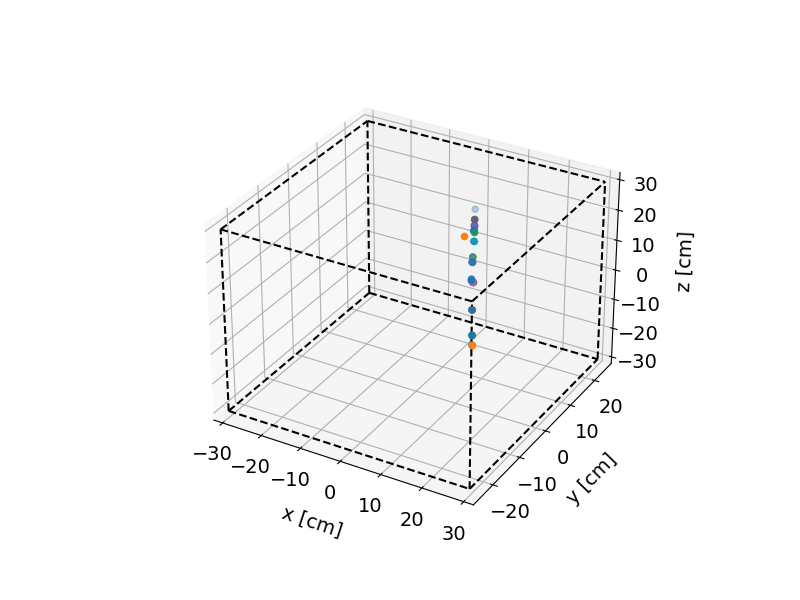

In [40]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
 
for t in visTrackList:
    ax.scatter( Event[(Event.trackID==t)]['startX']/10,
                Event[(Event.trackID==t)]['startY']/10,
                Event[(Event.trackID==t)]['startZ']/10,
                # s = Event[(Event.trackID==t)]['dE']/EvtMax * 14**2
              )
draw_boundaries(ax)
ax.set_xlabel('x [cm]', fontsize = 14, labelpad = 10)
ax.set_ylabel('y [cm]', fontsize = 14, labelpad = 10)
ax.set_zlabel('z [cm]', fontsize = 14, labelpad = 10)
ax.tick_params( axis = 'x', labelsize = 14 )
ax.tick_params( axis = 'y', labelsize = 14 )
ax.tick_params( axis = 'z', labelsize = 14 )
# ax.legend( fontsize = 18 )
ax.set_xlim( [-31, 31])
ax.set_ylim( [-26, 26])
ax.set_zlim( [-31, 31])
fig.savefig('CosmicRun0Evt229.pdf')